In [1]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.stats import multitest
from scipy.stats import norm

/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## behavior analysis

In [2]:
def zone_process(input_dir, file):  
    df_zone = pd.read_excel(input_dir+file)
    date = file.split('/')[-1].split('.')[0].split('-')[-1]
    df_zone['Fish_ID'] = df_zone.loc[:, (df_zone.columns.str.endswith('Pcolumn')|df_zone.columns.str.endswith('Prow'))].astype('str').agg(''.join, axis=1)
    df_zone['Fish_ID'] = date+'-'+'Plate'+df_zone.loc[:,(df_zone.columns.str.endswith('Plate')|df_zone.columns.str.endswith('Fish_ID'))].astype('str').agg('-'.join, axis=1)
    df_zone = df_zone.loc[:,['Unnamed: 3','Distance moved center-point Total mm','Fish_ID']]
    df_zone = df_zone.loc[df_zone['Unnamed: 3']=='In D'].iloc[:, 1:]
    df_zone.rename(columns={df_zone.columns[0]:'DZTD'}, inplace=True)
    df_zone.set_index('Fish_ID', inplace=True)
    df_zone.replace('-', 0, inplace=True)
    df_zone = df_zone.groupby('Fish_ID').mean()
    return df_zone
input_dir = '/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Brain_activity/'
dfs = []
for file in os.listdir(input_dir):
    if file.startswith('Zone_behavior'):
        print(file)
        df = zone_process(input_dir, file)
        dfs.append(df)
df_zone = pd.concat(dfs)
df_zone

Zone_behavior-20220427.xlsx
Zone_behavior-20220208.xlsx


,DZTD
Fish_ID,
20220427-Plate1-10A,157.962345
20220427-Plate1-10B,332.038250
20220427-Plate1-10C,120.848862
20220427-Plate1-10D,376.501000
20220427-Plate1-10E,75.340250
...,...
20220208-Plate1-6D,78.341875
20220208-Plate1-6E,60.093225
20220208-Plate1-6F,149.768100


In [3]:
input_data = '/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Brain_activity/BA_behavior_summary.xlsx'
df_mean_stats = pd.read_excel(input_data, sheet_name=0, index_col=0)
df_mean_stats = pd.concat((df_mean_stats, df_zone), axis=1)
df_mean_stats = df_mean_stats.dropna()
df_mean_stats

,LDCI,TDEN,ADED,LFDE,Velocity,TD,Cat,DZTD
Fish_ID,,,,,,,,
20220427-Plate1-5C,-0.995255,0.50,-0.495255,315.307175,1.844680,899.990750,SDA,2.472557
20220427-Plate1-5D,-0.988801,1.25,-0.864244,247.659100,1.673435,816.406750,SDA,7.675210
20220427-Plate1-9C,-0.987146,0.75,-0.368043,376.441750,0.856267,417.786250,SDA,18.078600
20220427-Plate1-1B,-0.980678,1.00,-0.321434,382.706500,1.776407,865.665000,SDA,4.537743
20220427-Plate1-6D,-0.979944,0.75,-0.076648,433.572000,1.484546,684.651250,SDA,17.882275
20220427-Plate1-3E,-0.968221,1.25,-0.571897,168.772800,0.989626,482.843750,SDA,7.329022
20220427-Plate1-2G,-0.266682,2.75,0.180639,185.522500,0.709619,334.866600,VDA,60.660300
20220427-Plate1-10F,-0.203456,6.00,-0.023369,179.926100,1.991790,967.195250,VDA,286.344250
20220427-Plate1-5G,-0.139854,4.50,0.006365,45.336083,1.928337,941.167250,VDA,292.595250


In [4]:
def outliers(x):
        Q1 = x.quantile(0.25)
        Q3 = x.quantile(0.75)
        IQR = Q3 - Q1
        limit1 = Q1 - 1.5*IQR
        limit2 = Q3 + 1.5*IQR
        return x[(x>limit1)&(x<limit2)]
def zscore(x):
    return (x-x.mean())/x.std()
df_all_norm_list = []
for i in range(len(list(df_mean_stats.groupby('Cat')))):
    cat = list(df_mean_stats.groupby('Cat'))[i][0]
    df = list(df_mean_stats.groupby('Cat'))[i][1]
    df_norm_list = []
    for trait in df_mean_stats.columns[:-2].append(df_mean_stats.columns[-1:]):
        df_norm_list.append(outliers(df[trait]))
    df_norm = pd.concat(df_norm_list,axis=1)
    df_norm['Cat'] = cat
    df_all_norm_list.append(df_norm)
df_mean_stats = pd.concat(df_all_norm_list)
df_mean_stats

,LDCI,TDEN,ADED,LFDE,Velocity,TD,DZTD,Cat
Fish_ID,,,,,,,,
20220427-Plate1-5C,-0.995255,0.50,-0.495255,315.307175,1.844680,899.990750,2.472557,SDA
20220427-Plate1-5D,-0.988801,1.25,-0.864244,247.659100,1.673435,816.406750,7.675210,SDA
20220427-Plate1-9C,-0.987146,0.75,-0.368043,376.441750,NaN,417.786250,NaN,SDA
20220427-Plate1-1B,-0.980678,1.00,-0.321434,382.706500,1.776407,865.665000,4.537743,SDA
20220427-Plate1-6D,-0.979944,0.75,-0.076648,433.572000,1.484546,684.651250,NaN,SDA
20220427-Plate1-3E,-0.968221,1.25,-0.571897,168.772800,0.989626,482.843750,7.329022,SDA
20220208-Plate1-3A,-1.000000,0.00,0.000000,480.000000,1.691647,778.072195,0.000000,SDA
20220208-Plate1-4A,-1.000000,0.00,0.000000,480.000000,2.303170,1104.160250,0.000000,SDA
20220208-Plate1-2C,-0.996139,0.50,NaN,439.612250,1.902241,904.968250,4.724900,SDA


In [6]:
df_all_norm_list = []
#for cat in df_mean_stats['Cat'].unique():
df_norm_list = []
for trait in df_mean_stats.columns[:-1]:
    df = df_mean_stats[trait].dropna()
    df_norm_list.append(zscore(df))
df_norm = pd.concat(df_norm_list,axis=1)
df_norm = pd.concat((df_norm, df_mean_stats['Cat']),axis=1)
df_norm

,LDCI,TDEN,ADED,LFDE,Velocity,TD,DZTD,Cat
Fish_ID,,,,,,,,
20220427-Plate1-5C,-0.918046,-0.764161,-1.041409,0.426133,0.023498,0.195828,-0.912828,SDA
20220427-Plate1-5D,-0.903033,-0.534913,-2.147962,0.001454,-0.365720,-0.159267,-0.883707,SDA
20220427-Plate1-9C,-0.899184,-0.687745,-0.659915,0.809922,NaN,-1.852751,NaN,SDA
20220427-Plate1-1B,-0.884141,-0.611329,-0.520141,0.849250,-0.131677,0.049999,-0.901268,SDA
20220427-Plate1-6D,-0.882435,-0.687745,0.213944,1.168572,-0.795039,-0.719012,NaN,SDA
20220427-Plate1-3E,-0.855168,-0.534913,-1.271249,-0.493775,-1.919929,-1.576363,-0.885645,SDA
20220208-Plate1-3A,-0.929081,-0.916993,0.443802,1.460036,-0.324328,-0.322126,-0.926667,SDA
20220208-Plate1-4A,-0.929081,-0.916993,0.443802,1.460036,1.065586,1.063213,-0.926667,SDA
20220208-Plate1-2C,-0.920100,-0.764161,NaN,1.206491,0.154326,0.216974,-0.900221,SDA


In [7]:
### define a function of statistical test for each gene for each parameter
### adjust p-val with FDR_bh method
def stats_test(df):
    def symbolize(x):
        if x>0.05:
            return 'ns'
        elif x>0.01:
            return '*'
        elif x>0.001:
            return '**'
        elif x>0.0001:
            return '*'*3

        else:
            return '*'*5
    
    com_res = []
    for j, param in enumerate(df.columns[:-1]):
        results = pg.anova(data=df, dv=param, between='Cat').round(3)
        results['parameter'] = param
        results = results.loc[results['Source']=='Cat']
        com_res.append(results)
    df_com_res = pd.concat(com_res)
    df_com_res['pval_adjust'] = pg.multicomp(df_com_res['p-unc'], method = 'fdr_bh', )[1]
    df_com_res['significance'] = df_com_res['pval_adjust'].apply(symbolize)
    return df_com_res


df_test_res = stats_test(df_norm)
    

In [8]:
df_test_res

,Source,ddof1,ddof2,F,p-unc,np2,parameter,pval_adjust,significance
0,Cat,1,15,541.689,0.000,0.973,LDCI,0.000000,*****
0,Cat,1,15,23.268,0.000,0.608,TDEN,0.000000,*****
0,Cat,1,12,10.316,0.007,0.462,ADED,0.009800,**
0,Cat,1,15,35.027,0.000,0.700,LFDE,0.000000,*****
0,Cat,1,13,1.454,0.249,0.101,Velocity,0.249000,ns
0,Cat,1,14,2.728,0.121,0.163,TD,0.141167,ns
0,Cat,1,12,90.201,0.000,0.883,DZTD,0.000000,*****


In [21]:
traitlist = df_test_res['parameter']
df_plot_list = []
for i, trait in enumerate(traitlist):
    df_plot = df_norm.loc[:,[trait, 'Cat']]
    df_plot.columns = ['performance', 'Cat']
    df_plot.loc[:,'trait'] = trait
    df_plot_list.append(df_plot)
df_plot = pd.concat(df_plot_list)
df_plot['trait'] = df_plot['trait'].apply(lambda x: 'TDDZ' if x=='DZTD' else x)

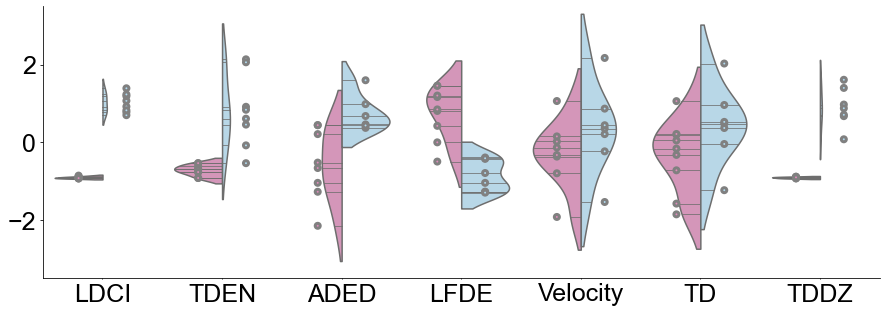

In [22]:
from matplotlib import rcParams
f, ax = plt.subplots(1,1, figsize=(15,5))
sns.violinplot(x='trait', y='performance', hue='Cat',data=df_plot,
                ax=ax, showfliers = False, palette = ['#DE8CBB', '#B0DAEF'],
                width=0.8,cut=1.5,split=True,inner="stick")
sns.stripplot(x='trait', y='performance', hue='Cat',data=df_plot,
              jitter=False, dodge=True, marker='o', palette = ['#DE8CBB', '#B0DAEF'],
              edgecolor='#808080',ax=ax, size=5,linewidth=3)

ax.legend("",frameon=False, loc = [0, 0.9])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-3.5, 3.5)
ax.set_ylabel('')
ax.set_xlabel('')
rcParams['xtick.major.size'] = 1
rcParams['font.size'] = 25
rcParams['text.color'] = 'black'
rcParams['font.family'] = 'Arial'
plt.show()

### Brain activity analysis

In [3]:
df_normalized_std = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Brain_activity/All_fish_normaliozed_region_mean_std.csv', index_col=0)
df_normalized_std = df_normalized_std.transpose() 
df_normalized_std['Cat'] = df_normalized_std.index.str[-3:]
df_normalized_std

,Diencephalon -,Diencephalon - Anterior pretectum cluster of vmat2 Neurons,Diencephalon - Caudal Hypothalamus,Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus,Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons,Diencephalon - Dopaminergic Cluster 2 - posterior tuberculum,Diencephalon - Dopaminergic Cluster 3 - hypothalamus,Diencephalon - Dopaminergic Cluster 4/5 - posterior tuberculum and hypothalamus,Diencephalon - Dopaminergic Cluster 6 - hypothalamus,Diencephalon - Dopaminergic Cluster 7 - Caudal Hypothalamus,...,Telencephalon - S1181t Cluster,Telencephalon - Subpallial Gad1b cluster,Telencephalon - Subpallial Otpb Cluster 2,Telencephalon - Subpallial Otpb strip,Telencephalon - Subpallial dopaminergic cluster,Telencephalon - Subpallium,Telencephalon - Telencephalic Migrated Area 4 (M4),Telencephalon - Vglut2 rind,Telencephalon - Vmat2 cluster,Cat
0427_Fish06SDA,235.513945,346.192630,124.835261,101.669954,359.062244,312.731632,334.609977,326.888208,132.557029,153.148412,...,1207.169839,832.664058,1137.673921,756.733332,984.525509,815.933559,325.601247,489.045351,778.611677,SDA
0427_Fish03SDA,130.930326,314.447422,112.685936,53.659970,60.099166,154.540713,147.028317,285.471039,183.517096,106.246740,...,479.720129,447.524147,473.280932,83.709553,370.253791,347.716603,130.930326,202.834685,473.280932,SDA
0427_Fish09SDA,198.225922,379.726533,155.483458,168.492034,169.111490,206.278850,138.758146,461.494726,30.353344,212.473411,...,732.197001,525.298694,652.906632,270.702275,576.094087,575.474631,211.853955,240.348931,641.136968,SDA
0427_Fish13SDA,190.084606,82.352731,96.337157,77.173314,271.919396,241.360835,14.502368,59.563296,518.459648,130.521310,...,767.589608,536.587607,745.318115,20.717668,726.672214,481.685787,330.446808,98.408924,537.623491,SDA
0427_Fish01SDA,257.273496,629.773732,132.610084,124.663412,448.490284,240.386819,182.773449,197.176792,269.690171,128.140081,...,503.123652,270.186838,476.303635,159.926768,205.620130,375.976905,107.776735,194.196790,321.840204,SDA
0427_Fish12VDA,208.293059,454.457584,112.500529,62.376531,375.373053,221.659459,98.020263,145.916528,69.059731,119.183729,...,388.739453,468.937850,428.838651,667.206110,706.191441,460.026917,52.351731,492.329049,605.943445,VDA
0427_Fish02VDA,180.571553,270.123299,126.987312,103.498329,373.621629,361.877138,1.468061,270.123299,82.945470,113.774759,...,786.146885,514.555524,717.147999,293.612282,720.818152,542.448691,159.284663,343.526370,576.948134,VDA
0427_Fish04VDA,187.637637,412.152035,150.760876,163.776203,290.675645,442.521132,342.736955,404.559760,49.892088,73.753522,...,790.681140,476.144061,748.381326,121.476389,629.074158,479.397893,152.930097,202.822185,496.751663,VDA
0427_Fish05VDA,233.355248,445.103528,89.308798,109.475301,282.331040,198.784100,390.365877,334.187762,184.379455,83.546941,...,573.304868,527.210004,586.269048,525.769539,616.518802,502.722108,205.986422,321.223582,538.733720,VDA
0427_Fish10VDA,220.346049,360.151818,193.752560,109.413211,216.546979,135.246885,414.098609,197.551630,66.863629,135.246885,...,188.433863,148.163723,169.438514,294.048003,211.228281,173.237583,328.239632,189.953491,292.528375,VDA


In [4]:
df_bigmask = df_normalized_std.loc[:,df_normalized_std.columns.str.split('-').str[-1].str.len()==0]
df_bigmask['Geno'] = df_bigmask.index.str[-3:]
df_bigmask['Whole_brain'] = df_bigmask.iloc[:,:-1].sum(axis=1)
df_bigmask

/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Diencephalon -,Mesencephalon -,Rhombencephalon -,Telencephalon -,Geno,Whole_brain
0427_Fish06SDA,235.513945,212.348639,238.087868,567.549999,SDA,1253.500451
0427_Fish03SDA,130.930326,270.446247,325.179416,329.472214,SDA,1056.028203
0427_Fish09SDA,198.225922,224.243075,249.640771,402.026949,SDA,1074.136717
0427_Fish13SDA,190.084606,235.663476,313.354732,336.662109,SDA,1075.764923
0427_Fish01SDA,257.273496,204.130129,261.246832,238.400151,SDA,961.050609
0427_Fish12VDA,208.293059,178.218660,257.303191,441.091184,VDA,1084.906095
0427_Fish02VDA,180.571553,223.145334,285.537944,394.174489,VDA,1083.429321
0427_Fish04VDA,187.637637,224.514398,274.406486,322.129353,VDA,1008.687874
0427_Fish05VDA,233.355248,292.414292,208.867351,478.234211,VDA,1212.871102
0427_Fish10VDA,220.346049,164.879630,278.091910,180.835723,VDA,844.153312


In [7]:
pg.anova(data = df_bigmask, dv = 'Whole_brain', between = 'Geno')

,Source,ddof1,ddof2,F,p-unc,np2
0,Geno,1,14,1.135767,0.304584,0.075039


In [5]:
p_val_list = []
for bigmask in df_bigmask.columns[:4]:
    p_val = pg.ancova(data = df_bigmask, dv = bigmask, covar='Whole_brain', between='Geno')
    p_val = p_val.iloc[0,4]
    p_val_list.append(p_val)
df_com_res_bigmask = pd.Series(p_val_list, index = df_bigmask.columns[0:4])
df_com_res_bigmask

Diencephalon -       0.464157
Mesencephalon -      0.886746
Rhombencephalon -    0.325918
Telencephalon -      0.967304
dtype: float64

In [127]:
def ancova(df):
    bigmasks = df.loc[:,df.columns.str.split('-').str[-1].str.len()==0].columns
    ancova_list = []
    mask_list = []
    for mask in df.columns[:-1]:
        if mask not in bigmasks and (mask.split('-')[0]+'-') in bigmasks:
            covariable = mask.split('-')[0]+'-'
            ancova = pg.ancova(data = df, dv = mask, covar=covariable, between='Cat')
            ancova_list.append(ancova.iloc[0,4])
            mask_list.append(mask)
        else: 
            next
    df_res = pd.Series(ancova_list)
    df_res.index = mask_list
    return df_res

In [31]:
arraylist = []
while len(arraylist)<10000:#the maximum round of permutation test based on current dataset is 210
    
    array = pd.Series(['SDA']*8+['VDA']*8).sample(frac=1).to_list()
    arraylist.append(array)

In [82]:
df_temp = pd.DataFrame(arraylist, columns=c.columns).drop_duplicates().transpose()

perm_list = []
df_normalized_std_shuffled = df_normalized_std.copy().transpose()
for column in df_temp.columns:
    df_normalized_std_shuffled['Cat'] = df_temp[column]
    perm_res = ancova(df_normalized_std_shuffled)
    perm_list.append(perm_res)
    if column%1000 == 0:
        print (i)

KeyboardInterrupt: 

In [216]:
df_perm_res = pd.concat(perm_list[:1881],axis=1)

In [136]:
df_exp_ancova = ancova(df_normalized_std)

In [243]:
pg.ancova(data = df, dv = 'Diencephalon - Anterior pretectum cluster of vmat2 Neurons', 
          covar='Diencephalon -', between='Cat')

,Source,SS,DF,F,p-unc,np2
0,Cat,2748.739499,1,0.149473,0.705294,0.011367
1,Diencephalon -,33096.709853,1,1.799753,0.202708,0.121607
2,Residual,239064.554135,13,NaN,NaN,NaN


In [240]:
ancova(df_normalized_std)

Diencephalon - Anterior pretectum cluster of vmat2 Neurons                                                      0.705294
Diencephalon - Caudal Hypothalamus                                                                              0.052413
Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus                                                 0.895006
Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons    0.500064
Diencephalon - Dopaminergic Cluster 2 - posterior tuberculum                                                    0.704386
                                                                                                                  ...   
Telencephalon - Subpallial dopaminergic cluster                                                                 0.448925
Telencephalon - Subpallium                                                                                      0.146432
Telencephalon - Telencephalic Mi

In [217]:
df_adj_p_ancova = pd.concat((df_exp_ancova,df_perm_res.mean(axis=1), df_perm_res.std(axis=1)),axis=1)
df_adj_p_ancova.columns = ['p-unc', 'perm_mean', 'perm_std']
df_adj_p_ancova

,p-unc,perm_mean,perm_std
Diencephalon - Anterior pretectum cluster of vmat2 Neurons,0.705294,0.490193,0.294246
Diencephalon - Caudal Hypothalamus,0.052413,0.502346,0.288166
Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus,0.895006,0.507809,0.286364
Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons,0.500064,0.500730,0.294173
Diencephalon - Dopaminergic Cluster 2 - posterior tuberculum,0.704386,0.505794,0.287163
...,...,...,...
Telencephalon - Subpallial dopaminergic cluster,0.448925,0.470764,0.269711
Telencephalon - Subpallium,0.146432,0.507419,0.291020
Telencephalon - Telencephalic Migrated Area 4 (M4),0.172589,0.490375,0.292332
Telencephalon - Vglut2 rind,0.041274,0.488850,0.282253


In [218]:
df_adj_p_ancova['p_adj'] = ((df_adj_p_ancova['p-unc'] - df_adj_p_ancova['perm_mean'])/df_adj_p_ancova['perm_std']).apply(lambda x: 1-norm.sf((x)))
df_adj_p_ancova.loc[df_adj_p_ancova['p_adj']<0.05]

,p-unc,perm_mean,perm_std,p_adj
Diencephalon - Migrated Posterior Tubercular Area (M2),0.035439,0.503006,0.280861,0.047980
Mesencephalon - Retinal Arborization Field 7 (AF7),0.038232,0.508391,0.281976,0.047720
Mesencephalon - Tecum Neuropil,0.008129,0.495543,0.293471,0.048371
Rhombencephalon - Medial Vestibular Nucleus,0.003539,0.500110,0.290535,0.043711
Rhombencephalon - Neuropil Region 4,0.004317,0.501802,0.287650,0.041862
Telencephalon - Isl1 cluster 1,0.010735,0.506209,0.290106,0.043827


In [230]:
def anova_comp(df):

    anova_list = []
    for mask in df.columns[:-1]:
        anova = pg.anova(dv=mask, between='Cat', data=df)
        anova_list.append(anova)

    df_res = pd.concat(anova_list)
    df_res.index = df.columns[:-1]
    return df_res

In [231]:
df_exp_anova = anova_comp(df_normalized_std)
df_exp_anova.loc[df_exp_anova['p-unc']<0.05]

,Source,ddof1,ddof2,F,p-unc,np2
Diencephalon - Caudal Hypothalamus,Cat,1,14,5.637472,0.032422,0.287077
Diencephalon - Hypothalamus Gad1b Cluster 1,Cat,1,14,5.062434,0.041055,0.265571
Diencephalon - Hypothalamus Vglut2 Cluster 2,Cat,1,14,5.884673,0.029377,0.295940
Diencephalon - Isl1 cluster 1,Cat,1,14,5.456394,0.034888,0.280442
Diencephalon - Migrated Posterior Tubercular Area (M2),Cat,1,14,6.697123,0.021478,0.323577
Diencephalon - Retinal Arborization Field 3 (AF3),Cat,1,14,6.093552,0.027062,0.303259
Ganglia - Olfactory Epithelium,Cat,1,14,8.203465,0.012496,0.369468
Mesencephalon - Sparse 6.7FRhcrtR cluster,Cat,1,14,4.632360,0.049306,0.248619
Rhombencephalon - Medial Vestibular Nucleus,Cat,1,14,14.229961,0.002061,0.504073
Rhombencephalon - Neuropil Region 4,Cat,1,14,6.551660,0.022690,0.318790


In [ ]:
df_temp = pd.DataFrame(arraylist, columns = df_normalized_std.index).drop_duplicates().transpose()

anova_perm_list = []
df_normalized_std_shuffled = df_normalized_std.copy()
for i, column in enumerate(df_temp.columns):
    df_normalized_std_shuffled['Cat'] = df_temp[column]
    anova_perm_res = anova_comp(df_normalized_std_shuffled)['p-unc']
    perm_list.append(anova_perm_res)
    if i%100 == 0:
        print (i)

In [184]:
df_anova_perm_res = pd.concat(perm_list[1881:],axis=1)

In [248]:
df_anova_perm_res.index = df_normalized_std.columns[:-1]

In [250]:
df_exp_anova = anova_comp(df_normalized_std)['p-unc']

In [251]:
df_adj_p_anova = pd.concat((df_exp_anova,df_anova_perm_res.mean(axis=1), df_anova_perm_res.std(axis=1)),axis=1)
df_adj_p_anova.columns = ['p-unc', 'perm_mean', 'perm_std']
df_adj_p_anova

,p-unc,perm_mean,perm_std
Diencephalon -,0.451178,0.498183,0.289782
Diencephalon - Anterior pretectum cluster of vmat2 Neurons,0.523522,0.490551,0.291090
Diencephalon - Caudal Hypothalamus,0.032422,0.508768,0.289058
Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus,0.817590,0.510364,0.284585
Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons,0.313920,0.489470,0.283325
...,...,...,...
Telencephalon - Subpallial dopaminergic cluster,0.918706,0.489266,0.291845
Telencephalon - Subpallium,0.116512,0.497949,0.292740
Telencephalon - Telencephalic Migrated Area 4 (M4),0.103804,0.482474,0.292381
Telencephalon - Vglut2 rind,0.626874,0.489581,0.294267


In [252]:
df_adj_p_anova['p_adj'] = ((df_adj_p_anova['p-unc'] - df_adj_p_anova['perm_mean'])/df_adj_p_anova['perm_std']).apply(lambda x: 1-norm.sf((x)))
df_adj_p_anova[df_adj_p_anova['p_adj']<0.05]

,p-unc,perm_mean,perm_std,p_adj
Diencephalon - Caudal Hypothalamus,0.032422,0.508768,0.289058,0.049684
Diencephalon - Isl1 cluster 1,0.034888,0.512923,0.283061,0.045628
Diencephalon - Migrated Posterior Tubercular Area (M2),0.021478,0.506869,0.287302,0.045564
Ganglia - Olfactory Epithelium,0.012496,0.513786,0.292254,0.043149
Rhombencephalon - Medial Vestibular Nucleus,0.002061,0.503617,0.287010,0.040274
Rhombencephalon - Neuropil Region 4,0.022690,0.506492,0.287386,0.046143
Rhombencephalon - Rhombomere 3,0.037513,0.422185,0.220816,0.040750


In [253]:
sigmask_perm_anova = df_adj_p_anova.loc[df_adj_p_anova['p_adj']<0.05].index.to_list()
sigmask_perm_anova.remove('Ganglia - Olfactory Epithelium')
pco_list = []
masks = []
for mask in sigmask_perm_anova:
    covariable = mask.split('-')[0]+'-'
    pco = pg.ancova(data = df_normalized_std, dv = mask, covar=covariable, between='Cat').iloc[1,4]
    pval = pg.ancova(data = df_normalized_std, dv = mask, covar=covariable, between='Cat').iloc[0,4]
    pco_list.append(pco)
    if pco<0.05 and pval>0.05:
        masks.append(mask)
        sigmask_perm_anova.remove(mask)
sigmask_perm_anova

['Diencephalon - Caudal Hypothalamus',
 'Diencephalon - Isl1 cluster 1',
 'Diencephalon - Migrated Posterior Tubercular Area (M2)',
 'Rhombencephalon - Medial Vestibular Nucleus',
 'Rhombencephalon - Neuropil Region 4',
 'Rhombencephalon - Rhombomere 3']

In [254]:
sigmask_perm_ancova = df_adj_p_ancova.loc[df_adj_p_ancova['p_adj']<0.05].index

In [255]:
ba_sigmasks = set(sigmask_perm_anova)|set(sigmask_perm_ancova)
ba_sigmasks

{'Diencephalon - Caudal Hypothalamus',
 'Diencephalon - Isl1 cluster 1',
 'Diencephalon - Migrated Posterior Tubercular Area (M2)',
 'Mesencephalon - Retinal Arborization Field 7 (AF7)',
 'Mesencephalon - Tecum Neuropil',
 'Rhombencephalon - Medial Vestibular Nucleus',
 'Rhombencephalon - Neuropil Region 4',
 'Rhombencephalon - Rhombomere 3',
 'Telencephalon - Isl1 cluster 1'}

In [256]:
df_normalized_std.groupby('Cat').mean()[ba_sigmasks].diff()

,Rhombencephalon - Rhombomere 3,Telencephalon - Isl1 cluster 1,Diencephalon - Migrated Posterior Tubercular Area (M2),Diencephalon - Isl1 cluster 1,Mesencephalon - Retinal Arborization Field 7 (AF7),Mesencephalon - Tecum Neuropil,Rhombencephalon - Medial Vestibular Nucleus,Rhombencephalon - Neuropil Region 4,Diencephalon - Caudal Hypothalamus
Cat,,,,,,,,,
SDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VDA,-58.4493,-230.094712,57.415304,188.507205,101.913588,27.937174,-212.405863,-90.206332,40.88562


In [314]:
def box_scatter_plot(sigmasks, df_comp, dotsize, yticklabel):
    df_temp_list = []
    for mask in sorted(list(sigmasks)):
        covariable = mask.split('-')[0]+'-'
        df_temp = df_comp.loc[:,['Cat', mask, covariable]]
        df_temp.loc[:,'mask'] = mask
        df_temp.rename(columns={mask:'HCR'}, inplace=True)
        #df_temp['HCR'] = df_temp['HCR']/df_temp[covariable]
        df_temp['HCR'] = (df_temp['HCR']-df_temp['HCR'].mean())/df_temp['HCR'].std()
        df_temp_list.append(df_temp)
    df_plot = pd.concat(df_temp_list)

    ## plot the data
    font_size = 2*len(list(sigmasks))
    fig, ax = plt.subplots(1, 1, figsize=(6,2*len(list(sigmasks))))
    sns.boxplot(y="mask", x="HCR", hue="Cat",
                data = df_plot,ax=ax, palette = ['#DE8CBB', '#B0DAEF'],width=0.5,fliersize=0)

    sns.stripplot(y="mask", x="HCR", hue="Cat",data=df_plot, 
                  jitter=True,dodge=True, marker='o', palette = ['#DE8CBB', '#B0DAEF'],edgecolor='#808080',
                  ax=ax, size=dotsize, linewidth=4)
    if yticklabel==True:
        ax.set_yticklabels(labels = sorted(list(sigmasks)),
                           ha='right', fontsize=font_size)
    else:
        ax.set_yticklabels('')
    ax.set_xticks([])
    ax.set_xticklabels('')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend("",frameon=False, loc = [0, 0.9])
    plt.show()

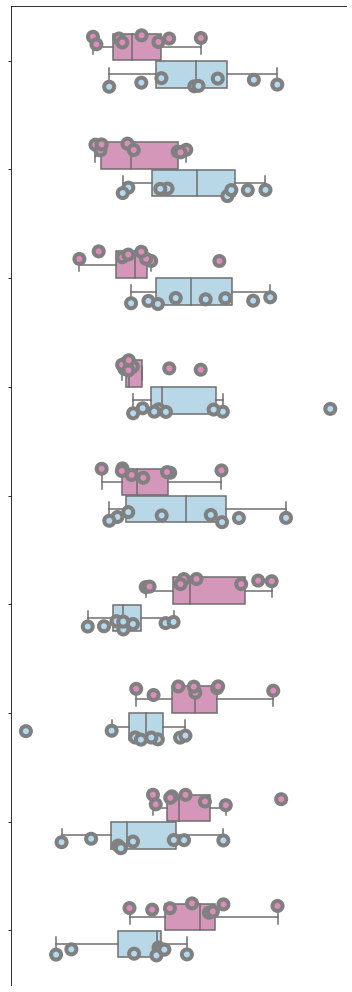

In [315]:
box_scatter_plot(sorted(list(ba_sigmasks)), df_normalized_std, 10, False)

In [284]:
ba_sigmasks

{'Diencephalon - Caudal Hypothalamus',
 'Diencephalon - Isl1 cluster 1',
 'Diencephalon - Migrated Posterior Tubercular Area (M2)',
 'Mesencephalon - Retinal Arborization Field 7 (AF7)',
 'Mesencephalon - Tecum Neuropil',
 'Rhombencephalon - Medial Vestibular Nucleus',
 'Rhombencephalon - Neuropil Region 4',
 'Rhombencephalon - Rhombomere 3',
 'Telencephalon - Isl1 cluster 1'}

In [305]:
sorted(list(ba_sigmasks))[:4]

['Diencephalon - Caudal Hypothalamus',
 'Diencephalon - Isl1 cluster 1',
 'Diencephalon - Migrated Posterior Tubercular Area (M2)',
 'Mesencephalon - Retinal Arborization Field 7 (AF7)']

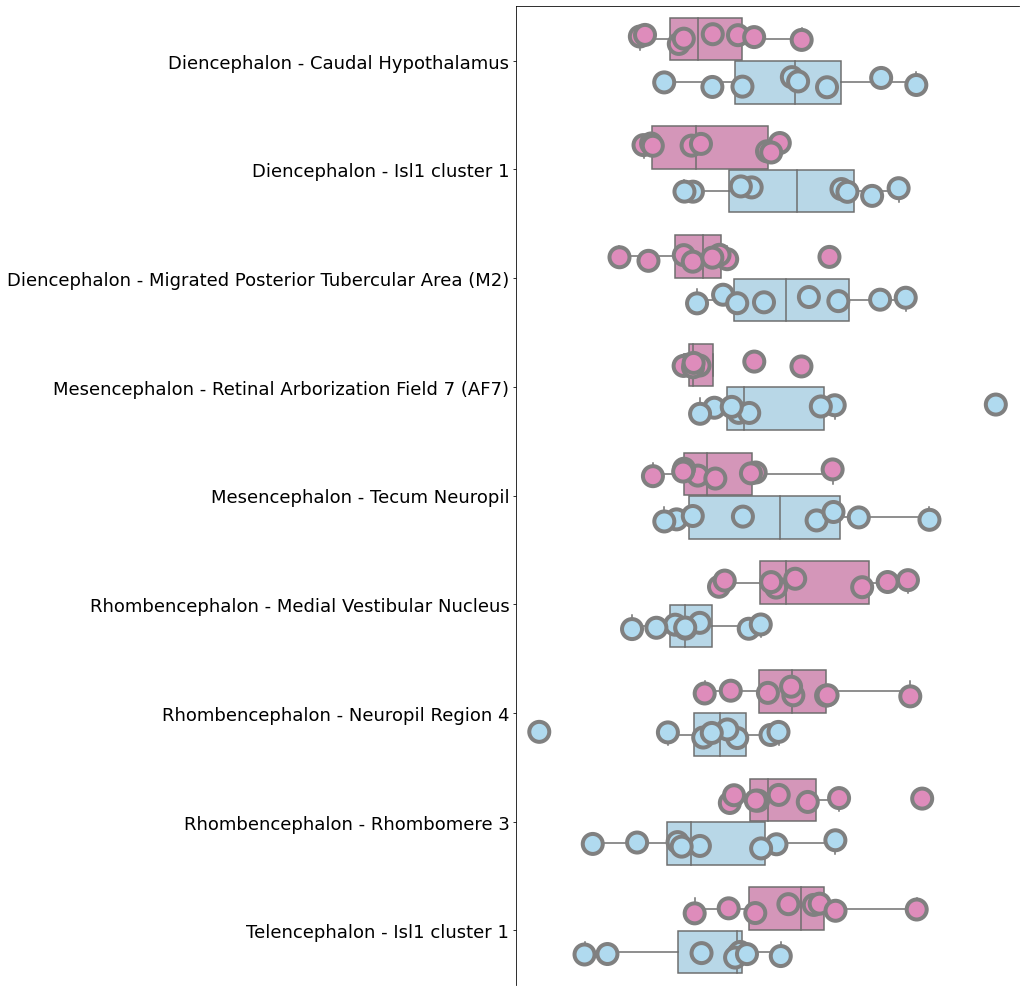

In [280]:
box_scatter_plot(ba_sigmasks, df_normalized_std, 20, True)

In [258]:
df_ba_stats = pd.concat((df_exp_anova, df_exp_ancova, df_adj_p_anova['p_adj'], df_adj_p_ancova['p_adj']),axis=1)
df_ba_stats.columns = ['p_unc_anova', 'p_unc_ancova','p_adj_anova', 'p_adj_ancova']
df_ba_stats = df_ba_stats.loc[~df_ba_stats.index.isin(df_bigmask.columns)]
df_ba_stats = df_ba_stats.dropna()

In [260]:
output_dir = '/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Brain_activity/'
df_ba_stats.to_csv(output_dir+'sv_ba_stats_20230819.csv')



In [264]:
df_normalized_std[['Cat']+list(ba_sigmasks)].groupby('Cat').mean()

,Rhombencephalon - Rhombomere 3,Telencephalon - Isl1 cluster 1,Diencephalon - Migrated Posterior Tubercular Area (M2),Diencephalon - Isl1 cluster 1,Mesencephalon - Retinal Arborization Field 7 (AF7),Mesencephalon - Tecum Neuropil,Rhombencephalon - Medial Vestibular Nucleus,Rhombencephalon - Neuropil Region 4,Diencephalon - Caudal Hypothalamus
Cat,,,,,,,,,
SDA,346.897418,612.252023,83.733573,174.258537,42.298884,99.489540,331.720486,402.189781,109.794536
VDA,288.448118,382.157311,141.148877,362.765742,144.212472,127.426714,119.314623,311.983449,150.680156
